In [48]:
from matplotlib import pyplot
import pandas as pd
pyplot.rcParams["figure.figsize"] = (20,4)

In [49]:
BAND_DATA_PATH = "./build/juce_fft_equalizer_artefacts/Debug/last_band_data.csv"
FFT_DATA_PATH = "./build/juce_fft_equalizer_artefacts/Debug/fft_audio_latest.csv"

SHOW_FROM = 0 #Hz
SHOW_TO = 600 #Hz

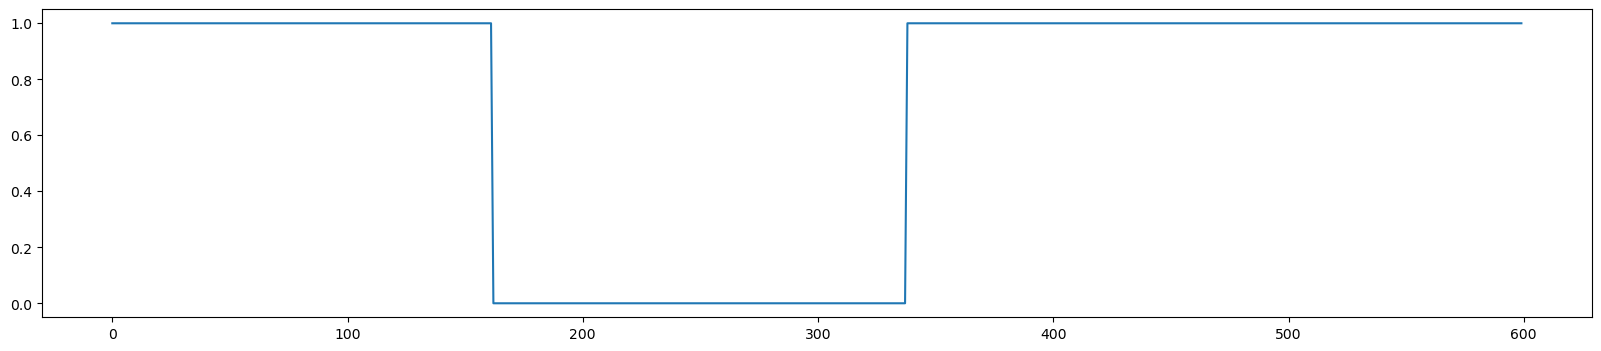

In [50]:
gains_table = pd.read_csv(BAND_DATA_PATH, header=0, comment='#')[SHOW_FROM:SHOW_TO]
pyplot.plot(gains_table.frequency, gains_table.gain)

Sample rate: 44100 Hz
FFT block size: 2048


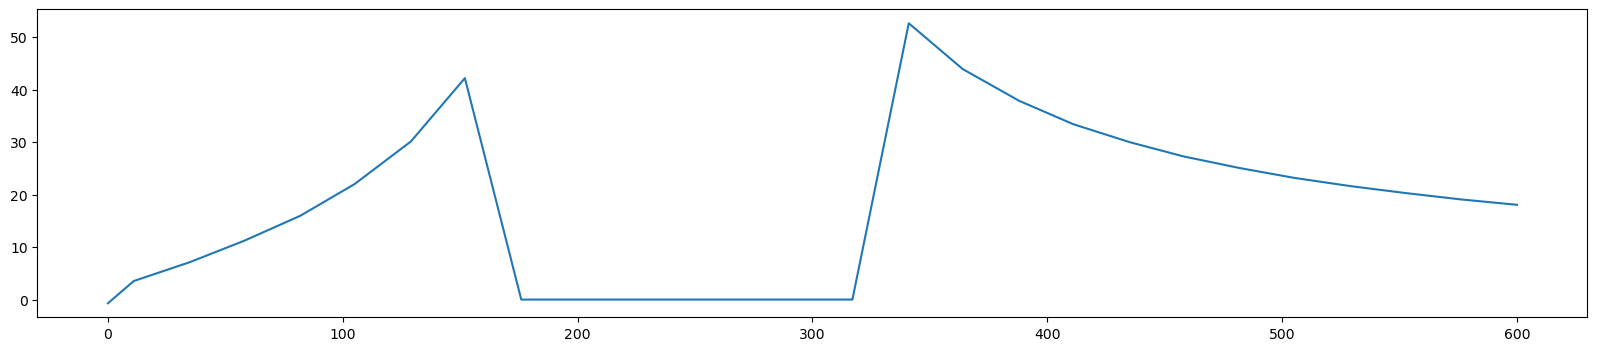

In [51]:

audio_table = pd.read_csv(FFT_DATA_PATH, header=0, comment='#')
with open(FFT_DATA_PATH, 'r') as f:
    metadata = f.readlines()[0][1:-1].split(',')
    sample_rate = int(metadata[0].split('=')[1])
    fft_size = int(metadata[1].split('=')[1])
    print("Sample rate:", sample_rate, "Hz")
    print("FFT block size:", fft_size)
audio_table = audio_table.loc[audio_table.frequency <= SHOW_TO].loc[audio_table.frequency >= SHOW_FROM]
pyplot.plot(audio_table.frequency, audio_table.magnitude)